In [2]:
import numpy as np
import sqlite3
import plotly.express as px
import pandas as pd
import sqlite3
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import statsmodels
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
from useful_functions import *

In [3]:
tables_to_join = ["tSoilNutrients", "tPlantDNA", "tSample"]
common_column = "sample_id"
full_df = import_all_data(tables_to_join, common_column)
full_df.shape

(160, 29)

In [4]:
full_df = full_df.T.drop_duplicates().T

In [5]:
full_df.head()

,sample_id,OM,ENR,CEC,pH,BpH,Phosphorus,Potassium,Calcium,Magnesium,...,V1,V2,species,PC1,PC2,PC3,PC4,PC5,site_id,collect_date
0,RRL1,19.4,150.0,9.5,5.9,6.77,10.0,180.0,1200.0,153.0,...,0.753244,0.246756,exaltata,0.194769,0.048276,-0.02388,-0.017138,-0.039842,RRL,6/25/2021
1,RRL9,17.6,150.0,4.8,5.4,6.79,11.0,107.0,471.0,89.0,...,0.581366,0.418634,exaltata,0.097719,0.094733,-0.00656,0.012822,-0.022248,RRL,6/25/2021
2,RRL17,14.7,150.0,6.7,6.0,6.83,9.0,172.0,824.0,133.0,...,0.591513,0.408487,exaltata,0.099527,0.091996,0.004098,-0.021347,0.00719,RRL,6/25/2021
3,FRW3,11.2,150.0,15.0,6.4,6.8,25.0,133.0,2437.0,127.0,...,0.048066,0.951934,syriaca,-0.139465,-0.064022,-0.009963,-0.047536,0.024757,FRW,6/25/2021
4,FRW12,11.9,150.0,12.8,6.6,6.85,25.0,137.0,2098.0,130.0,...,0.003946,0.996054,syriaca,-0.155135,0.055455,0.009907,-0.043334,-0.009337,FRW,6/25/2021


In [6]:
df = full_df.copy()

In [7]:
nutrients = df.columns.drop(['sample_id','site_id','collect_date','V1', 'V2', 'species', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
print(nutrients)

Index(['OM', 'ENR', 'CEC', 'pH', 'BpH', 'Phosphorus', 'Potassium', 'Calcium',
       'Magnesium', 'Sulfur', 'Sodium', 'Zinc', 'Manganese', 'Iron', 'Copper',
       'Boron'],
      dtype='object')


In [8]:
df = df[df["species"].isin(['syriaca','exaltata'])]
df.shape

(151, 27)

In [9]:
site_list = df['site_id']

df['BGR'] = site_list

df['BGR'].replace({'CMB': 1, 'FRW': 1, 'LFS': 1, 'LM': 0, 'MMP': 1, 'MKP': 2,
                    'PNR': 2, 'PTW': 0, 'RF': 2, 'RGT': 0, 'RRL': 0, 'SGC': 0, 'SLG': 1,'HR': 3}, inplace=True) #
df = df[df["BGR"].isin([0,1,2,3])]

df['BGR'] = df['BGR'].replace([0], 'Wintergreen')
df['BGR'] = df['BGR'].replace([1], 'Cole Mountain')
df['BGR'] = df['BGR'].replace([2], 'Blacksburg')
df['BGR'] = df['BGR'].replace([3], 'HR')

In [10]:
df.shape

(151, 28)

### Combined Soil Nutrients PCA Figure

In [14]:
df[nutrients] = StandardScaler().fit_transform(df[nutrients])  

In [15]:
X = df[nutrients]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig1 = px.scatter(components, x=0, y=1, color=df['site_id'])
fig1.update_layout(
    title = "Soil Microbes by Site without Reduction",
    xaxis_title="PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%',
    yaxis_title="PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')

fig2 = px.scatter(components, x=0, y=1, color=df['species'])
fig2.update_layout(
    title = "Soil Microbes by Site without Reduction",
    xaxis_title="PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%',
    yaxis_title="PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')

fig3 = px.scatter(components, x=0, y=1, color=df['BGR'])
fig3.update_layout(
    title = "Soil Microbes by Site without Reduction",
    xaxis_title="PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%',
    yaxis_title="PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')

fig1.show()
fig2.show()
fig3.show()

In [16]:
#YAYYYYY THIS WORKS
fig1.write_image("fig1.png",format='png',engine='kaleido')
fig2.write_image("fig2.png",format='png',engine='kaleido')
fig3.write_image("fig3.png",format='png',engine='kaleido')

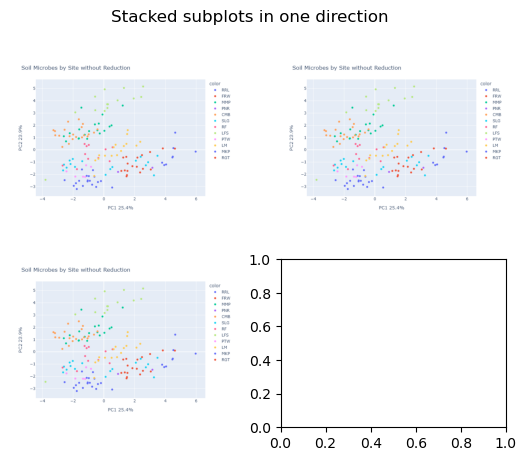

In [19]:
import matplotlib.image as mpimg
img1=mpimg.imread('fig1.png')
img2=mpimg.imread('fig1.png')
img3=mpimg.imread('fig1.png')


# create 2 subplots
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0][0].imshow(img1)
ax[0][1].imshow(img2)
ax[1][0].imshow(img3)


# plot 2 subplots
ax[0][0].axis('off')
ax[0][1].axis('off')
ax[1][0].axis('off')

fig.suptitle('Stacked subplots in one direction')
plt.show()

In [23]:
fig.savefig("test.png", bbox_inches='tight')

In [ ]:
# create 2 subplots
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot(x, y1)
ax[1].plot(x, y2)
 
# plot 2 subplots
ax[0].set_title('Simple plot with sin(x)')
ax[1].set_title('Simple plot with sin(x**2)')
 
fig.suptitle('Stacked subplots in one direction')
plt.show()

In [ ]:
X = df[nutrients]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

In [43]:
x_list = []
y_list = []
for i in components:
    x_list.append(i[0])
    y_list.append(i[1])

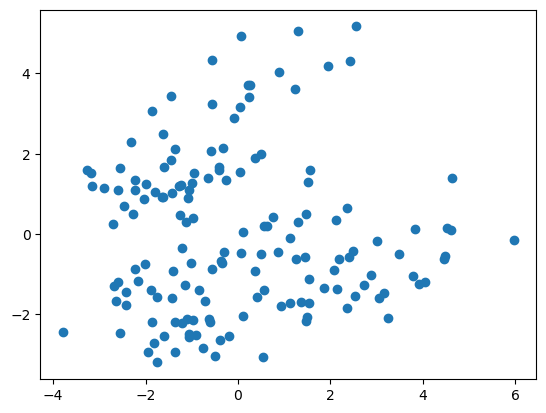

In [62]:
plt.scatter(x_list, y_list)

In [89]:
fig = make_subplots(rows=2, cols=2)

for site in df['site_id'].unique():
    subdf = df[df['site_id'] == site]
    print(subdf.shape)
    X = subdf[nutrients]
    pca = PCA(n_components=2)
    components = pca.fit_transform(X)
    
    x_list = []
    y_list = []
    for i in components:
        x_list.append(i[0])
        y_list.append(i[1])
    
    fig.add_trace(go.Scatter(x=x_list, y=y_list, mode='markers'), row=1, col=1)
    fig.add_trace(go.Scatter(x=x_list, y=y_list, mode='markers'), row=1, col=1)
#fig.add_trace(go.Scatter(x=series2['timestamp'], y=series2['data']), row=1, col=2)

fig.show()

(19, 27)
(11, 27)
(19, 27)
(2, 27)
(21, 27)
(17, 27)
(11, 27)
(14, 27)
(6, 27)
(16, 27)
(8, 27)
(7, 27)
